**Milestone 2: Exploratory Data Analysis (EDA)**

**Dataset Description and Details:**

The dataset contain 35,685 examples of 48x48 pixel gray scale images of faces
divided into train and test dataset. Images are categorized based on the emotion shown
in the facial expressions Happiness, Neutral , Sadness ,Anger, Surprise, Disgust, Fear.
Dataset Source:

https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer/data

In [ ]:
#Mountuing google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


['test', 'train']


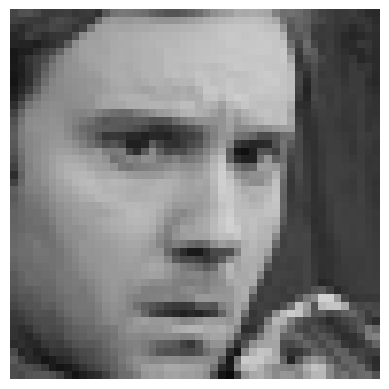

In [ ]:
#displaying a sample image
import os
dataset_dir = "/content/drive/MyDrive/emotion_data"
print(os.listdir(dataset_dir))
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('/content/drive/MyDrive/emotion_data/train/angry/im0.png')
plt.imshow(img)
plt.axis('off')
plt.show()

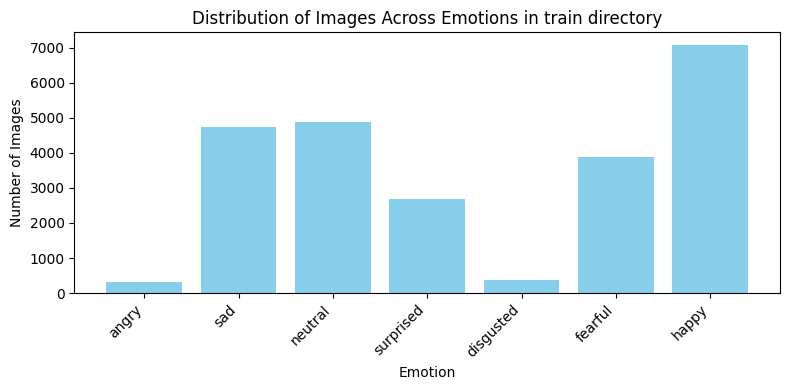

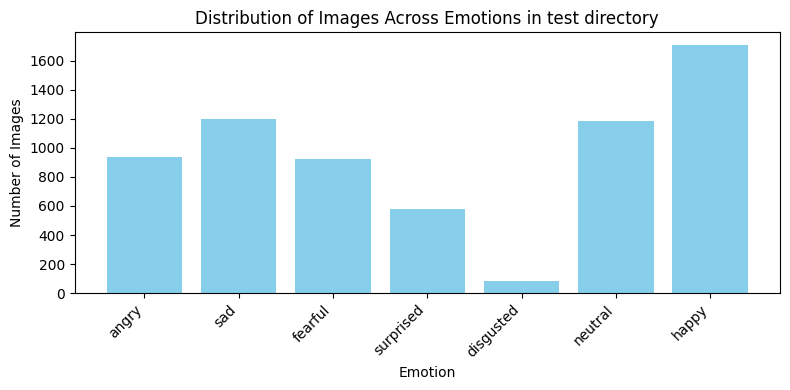

In [ ]:
#Distribution of images among various emotions in test and train directories
import os
import matplotlib.pyplot as plt

# Define the path to the dataset directory in your Google Drive
dataset_dir = "/content/drive/MyDrive/emotion_data"

# Dictionary to store the count of images for each emotion
emotion_counts = {}

# Iterate through each emotion folder in the dataset
for emotion in os.listdir(os.path.join(dataset_dir, 'train')):
    # Count the number of images in the emotion folder
    num_images = len(os.listdir(os.path.join(dataset_dir, 'train', emotion)))

    # Store the count in the dictionary
    emotion_counts[emotion] = num_images

# Extract emotion labels and corresponding counts
emotions = list(emotion_counts.keys())
counts = list(emotion_counts.values())

# Create a bar plot
plt.figure(figsize=(8, 4))
plt.bar(emotions, counts, color='skyblue')
plt.title('Distribution of Images Across Emotions in train directory')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

test_emotion_counts={}
for emotion in os.listdir(os.path.join(dataset_dir, 'test')):
    num_images = len(os.listdir(os.path.join(dataset_dir, 'test', emotion)))
    test_emotion_counts[emotion] = num_images

test_emotions=list(test_emotion_counts.keys())
test_emotion_counts=list(test_emotion_counts.values())
plt.figure(figsize=(8, 4))
plt.bar(test_emotions, test_emotion_counts, color='skyblue')
plt.title('Distribution of Images Across Emotions in test directory')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#Rescaling and Resizing images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_width, img_height = 48, 48
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/emotion_data/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/emotion_data/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 23959 images belonging to 7 classes.
Found 6614 images belonging to 7 classes.


In [ ]:
#Analysing for duplicate images
import os
import hashlib
dataset_dir = "/content/drive/MyDrive/emotion_data"
def calculate_hash(file_path):
    with open(file_path, 'rb') as f:
        image_data = f.read()
        return hashlib.md5(image_data).hexdigest()
hashes = {}
duplicate_images = []
def find_and_delete_duplicates(folder_path):
    for emotion in os.listdir(folder_path):
        for filename in os.listdir(os.path.join(folder_path, emotion)):
            image_path = os.path.join(folder_path, emotion, filename)
            image_hash = calculate_hash(image_path)
            if image_hash in hashes:
                duplicate_images.append((image_path, hashes[image_hash]))
                os.remove(image_path)
            else:
                hashes[image_hash] = image_path
find_and_delete_duplicates(os.path.join(dataset_dir, 'train'))
find_and_delete_duplicates(os.path.join(dataset_dir, 'test'))

print(f"Number of duplicate images found: {len(duplicate_images)}")


Number of duplicate images found: 0


250 duplicate images were found,which were removed through above iterative process.

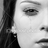

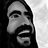

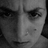

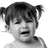

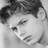

In [ ]:
# Randomly selecting 5 images to analyse properties
import os
import cv2
import random
from google.colab.patches import cv2_imshow
dataset_dir = "/content/drive/MyDrive/emotion_data"
def get_png_image_files(directory):
    png_image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
          png_image_files.append(os.path.join(root, file))
    return png_image_files
all_png_image_files = get_png_image_files(dataset_dir)
selected_png_image_files = random.sample(all_png_image_files, 5)
for image_file in selected_png_image_files:
    image = cv2.imread(image_file)
    cv2_imshow(image)

**Basic Data Characteristics and Visualizations**

Image: im4639.png
  Dynamic Range: 241
  Aspect Ratio: 1.0
  Entropy: 7.395542621612549
  Bluriness: 2072.634471563645
  Hue: 0.0
  Saturation: 0.0
  Value: 142.59201388888889


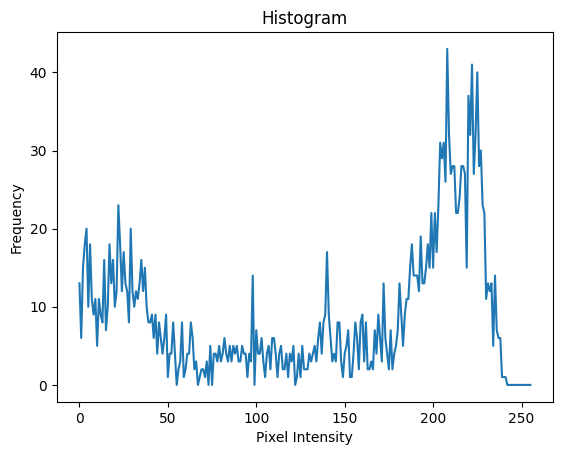

Image: im4154.png
  Dynamic Range: 255
  Aspect Ratio: 1.0
  Entropy: 6.759970664978027
  Bluriness: 4358.320237147955
  Hue: 0.0
  Saturation: 0.0
  Value: 103.09375


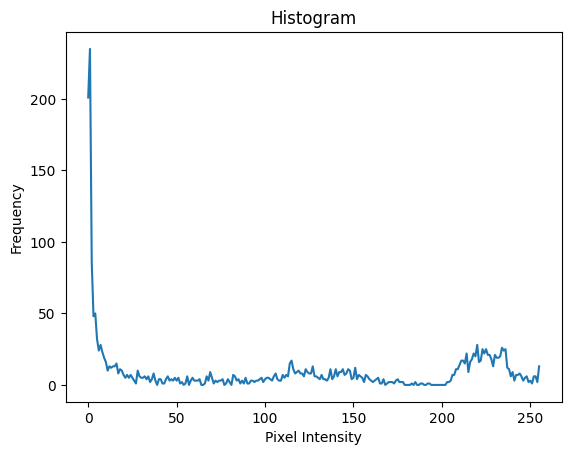

Image: im677.png
  Dynamic Range: 134
  Aspect Ratio: 1.0
  Entropy: 6.919285297393799
  Bluriness: 575.7610765621986
  Hue: 0.0
  Saturation: 0.0
  Value: 68.73524305555556


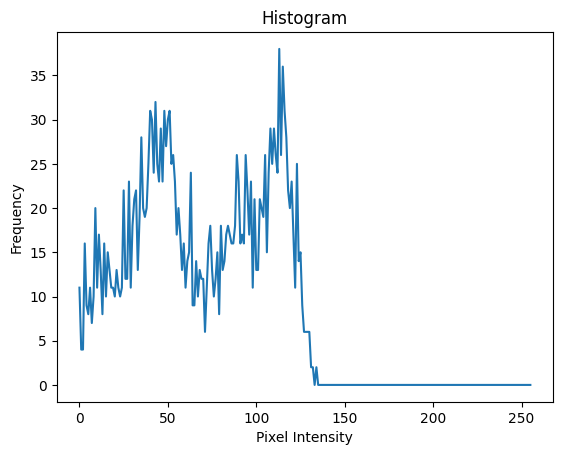

Image: im797.png
  Dynamic Range: 255
  Aspect Ratio: 1.0
  Entropy: 6.986632823944092
  Bluriness: 4194.4265225257395
  Hue: 0.0
  Saturation: 0.0
  Value: 159.96788194444446


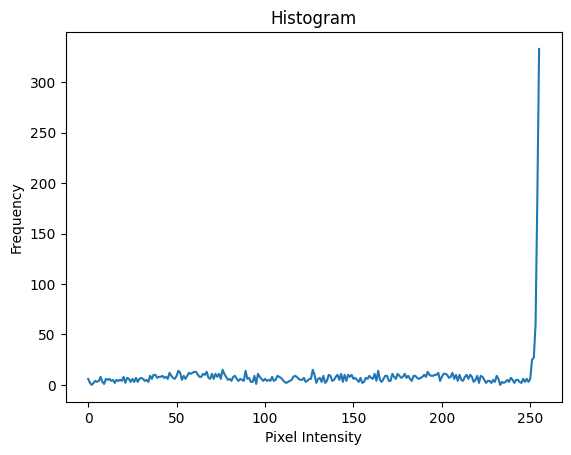

Image: im1064.png
  Dynamic Range: 216
  Aspect Ratio: 1.0
  Entropy: 7.3348894119262695
  Bluriness: 2362.1114349365234
  Hue: 0.0
  Saturation: 0.0
  Value: 148.62847222222223


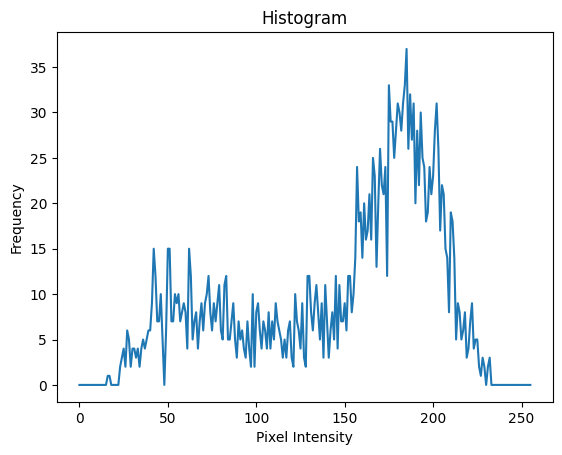

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
def calculate_dynamic_range(image):
    return image.max() - image.min()
def calculate_aspect_ratio(image):
    height, width = image.shape[:2]
    return width / height
def calculate_histogram(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist.flatten()
def calculate_entropy(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist /= hist.sum()
    return -np.sum(hist * np.log2(hist + 1e-8))
def calculate_bluriness(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()
def calculate_hsv_characteristics(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hue = hsv[..., 0].mean()
    saturation = hsv[..., 1].mean()
    value = hsv[..., 2].mean()
    return hue, saturation, value
for image_path in selected_png_image_files:
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dynamic_range = calculate_dynamic_range(gray_image)
    aspect_ratio = calculate_aspect_ratio(image)
    histogram = calculate_histogram(gray_image)
    entropy = calculate_entropy(gray_image)
    bluriness = calculate_bluriness(gray_image)
    hue, saturation, value = calculate_hsv_characteristics(image)
    print(f"Image: {os.path.basename(image_path)}")
    print(f"  Dynamic Range: {dynamic_range}")
    print(f"  Aspect Ratio: {aspect_ratio}")
    print(f"  Entropy: {entropy}")
    print(f"  Bluriness: {bluriness}")
    print(f"  Hue: {hue}")
    print(f"  Saturation: {saturation}")
    print(f"  Value: {value}")
    plt.plot(histogram)
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
dynamic_ranges = []
aspect_ratios = []
bluriness_values = []
label_list = []

# Iterate through each image file and its corresponding label
for image_path in selected_png_image_files:
    # Read the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate parameters
    dynamic_range = calculate_dynamic_range(gray_image)
    aspect_ratio = calculate_aspect_ratio(image)
    bluriness = calculate_bluriness(gray_image)

    # Append parameter values to the lists
    dynamic_ranges.append(dynamic_range)
    aspect_ratios.append(aspect_ratio)
    bluriness_values.append(bluriness)

# Perform statistical analysis
dynamic_range_mean = np.mean(dynamic_ranges)
dynamic_range_std = np.std(dynamic_ranges)

aspect_ratio_mean = np.mean(aspect_ratios)
aspect_ratio_std = np.std(aspect_ratios)

bluriness_mean = np.mean(bluriness_values)
bluriness_std = np.std(bluriness_values)

# Print the results
print("Dynamic Range:")
print(f"  Mean: {dynamic_range_mean}")
print(f"  Standard Deviation: {dynamic_range_std}\n")

print("Aspect Ratio:")
print(f"  Mean: {aspect_ratio_mean}")
print(f"  Standard Deviation: {aspect_ratio_std}\n")

print("Bluriness:")
print(f"  Mean: {bluriness_mean}")
print(f"  Standard Deviation: {bluriness_std}\n")

Dynamic Range:
  Mean: 220.2
  Standard Deviation: 45.39339158952545

Aspect Ratio:
  Mean: 1.0
  Standard Deviation: 0.0

Bluriness:
  Mean: 2712.6507485472125
  Standard Deviation: 1414.403310621682



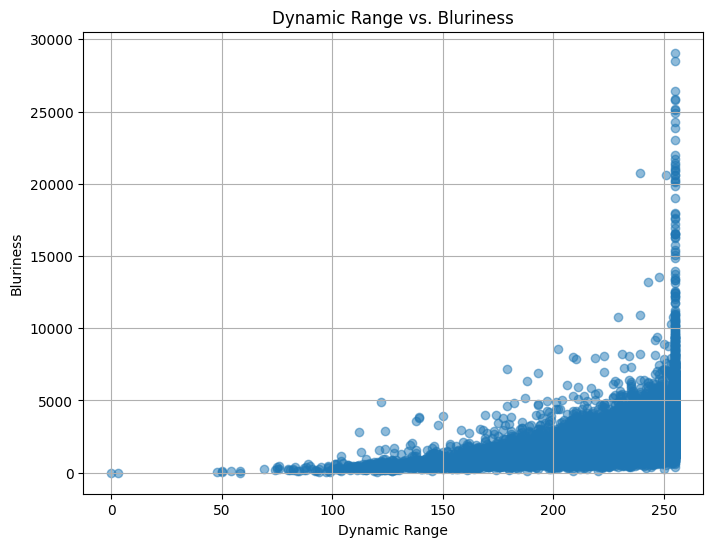

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
dataset_dir = "/content/drive/MyDrive/emotion_data"

dynamic_ranges = []
bluriness_values = []
for emotion in os.listdir(os.path.join(dataset_dir, 'train')):
    for filename in os.listdir(os.path.join(dataset_dir, 'train', emotion)):
        image_path = os.path.join(dataset_dir, 'train', emotion, filename)
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Calculate dynamic range and bluriness
        dynamic_range = calculate_dynamic_range(gray_image)
        bluriness = calculate_bluriness(gray_image)

        # Append values to lists
        dynamic_ranges.append(dynamic_range)
        bluriness_values.append(bluriness)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(dynamic_ranges, bluriness_values, alpha=0.5)
plt.title('Dynamic Range vs. Bluriness')
plt.xlabel('Dynamic Range')
plt.ylabel('Bluriness')
plt.grid(True)
plt.show()


**Surprises**


*   Initially, I expected the distribution of emotions to be relatively balanced across the dataset. However, upon visualizing the distribution, I discovered a significant class imbalance, with some emotions being much more prevalent than others. I would to like to apoproach this issue by stratified sampling, oversampling minority classes, or applying class weighting during model training.
*   I anticipated relatively consistent pixel intensity distributions across different emotions. However, when calculating basic statistics for pixel intensity values, I observed significant variability in both mean and standard deviation among different emotion classes.To mitigate the impact of pixel intensity variability, I considered preprocessing techniques such as normalization or standardization to rescale pixel values and reduce the influence of variability across different emotion classes.



### **Milestone 3**

In [ ]:

# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam as Adam_legacy
from keras.preprocessing.image import ImageDataGenerator
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        '/content/drive/MyDrive/emotion_data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
test_generator = validation_data_gen.flow_from_directory(
        '/content/drive/MyDrive/emotion_data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# create model structure
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
TF_DISABLE_MKL=1
cv2.ocl.setUseOpenCL(False)
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam_legacy(learning_rate=0.0001), metrics=['accuracy'])

# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=23959 // 64,
        epochs=25,
        validation_data=test_generator,
        validation_steps=6614 // 64)

# save model structure in json file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

Found 23959 images belonging to 7 classes.
Found 6614 images belonging to 7 classes.
Epoch 1/25
374/374 [==============================] - 409s 1s/step - loss: 1.6828 - accuracy: 0.2919 - val_loss: 1.8520 - val_accuracy: 0.2922
Epoch 2/25
374/374 [==============================] - 402s 1s/step - loss: 1.5425 - accuracy: 0.3850 - val_loss: 1.7532 - val_accuracy: 0.3880
Epoch 3/25
374/374 [==============================] - 400s 1s/step - loss: 1.4429 - accuracy: 0.4389 - val_loss: 1.7094 - val_accuracy: 0.4125
Epoch 4/25
374/374 [==============================] - 401s 1s/step - loss: 1.3765 - accuracy: 0.4643 - val_loss: 1.7121 - val_accuracy: 0.4254
Epoch 5/25
374/374 [==============================] - 406s 1s/step - loss: 1.3292 - accuracy: 0.4873 - val_loss: 1.6882 - val_accuracy: 0.4404
Epoch 6/25
374/374 [==============================] - 401s 1s/step - loss: 1.2803 - accuracy: 0.5071 - val_loss: 1.5626 - val_accuracy: 0.4548
Epoch 7/25
374/374 [==============================] - 403

In [ ]:
emotion_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

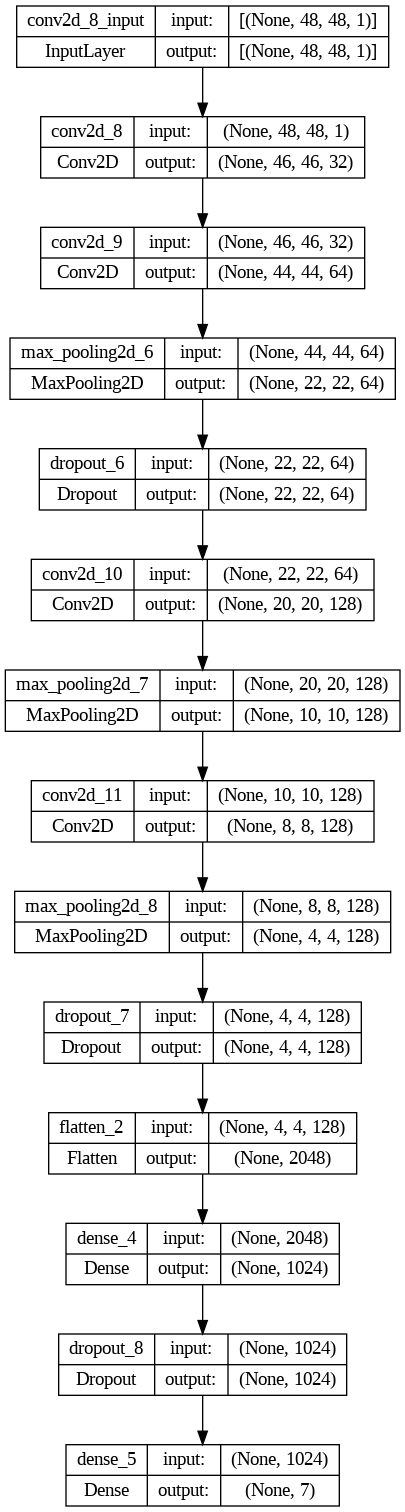

In [ ]:
from keras.utils import plot_model

plot_model(emotion_model, to_file='emotion_model.png', show_shapes=True, show_layer_names=True)


Loaded model from disk
1/1 [==============================] - 0s 39ms/step


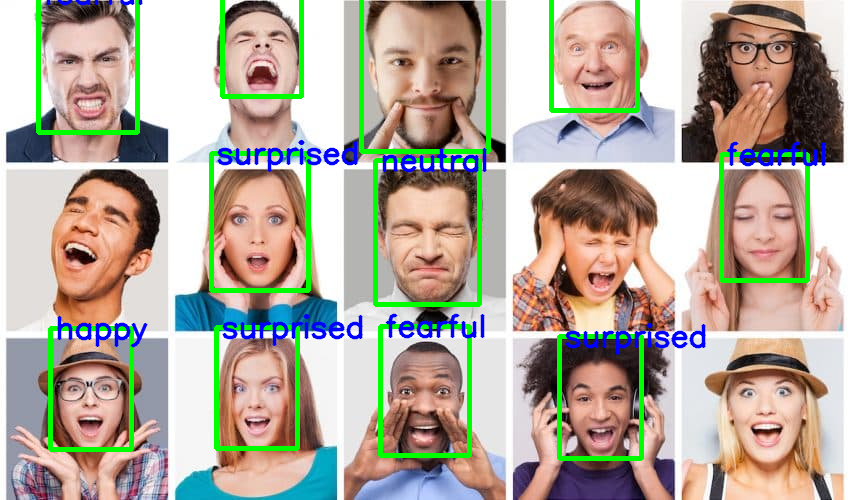

In [ ]:
from google.colab.patches import cv2_imshow

import cv2
import numpy as np
from keras.models import model_from_json

emotion_dict = {0: "angry", 1: "disgusted", 2: "fearful", 3: "happy", 4: "neutral", 5: "sad", 6: "surprised"}

# load json and create model
json_file = open('/content/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("/content/emotion_model.h5")
print("Loaded model from disk")

# pass here your video path
image = cv2.imread("/content/Scientists-identify-27-different-human-emotions--850x500 (1).jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_alt.xml')

# detect faces available on camera
num_faces = face_detector.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
for (x, y, w, h) in num_faces:
    cv2.rectangle(image, (x, y-30), (x+w, y+h+10), (0, 255, 0), 4)
    roi_gray_frame = gray_image[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
    emotion_prediction = emotion_model.predict(cropped_img)
    maxindex = int(np.argmax(emotion_prediction))
    cv2.putText(image, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

cv2_imshow(image)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


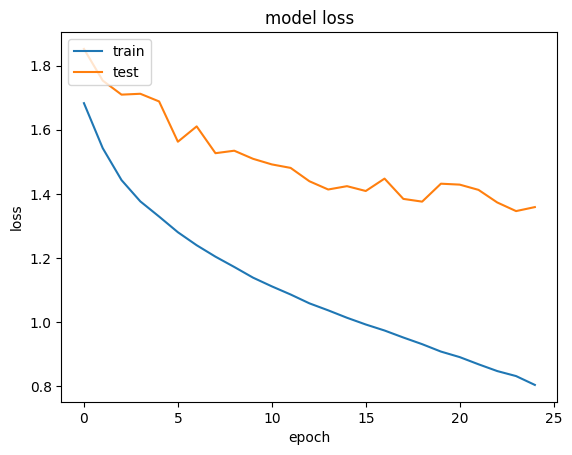

In [ ]:
print(emotion_model_info.history.keys())

import matplotlib.pyplot as plt
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

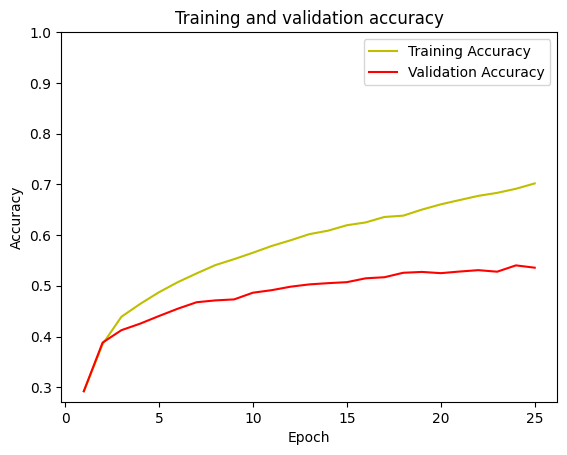

In [ ]:
#Accuracy visualization
accuracy_train = emotion_model_info.history['accuracy']
accuracy_val =emotion_model_info.history['val_accuracy']

# Create count of the number of epochs
count_epoch = range(1, len(accuracy_train) + 1)

#Plotting the graph
plt.plot(count_epoch,accuracy_train, 'y')
plt.plot(count_epoch,accuracy_val, 'r')
plt.title('Training and validation accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(top = 1)
plt.show()

Found 6614 images belonging to 7 classes.


<ipython-input-29-ac263ddf3c39>:24: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = emotion_model.predict_generator(validation_generator, 104)


Confusion Matrix
[[  25   29  163  151  240  288   43]
 [   0   19   17    7    7   27    3]
 [   1    8  289   82  169  279   94]
 [   0    0   43 1432  114   93   28]
 [   0    5   65  115  758  225   14]
 [   0    5  119  117  300  637   21]
 [   1    2   62   62   41   31  383]]
Classification Report
              precision    recall  f1-score   support

       angry       0.93      0.03      0.05       939
   disgusted       0.28      0.24      0.26        80
     fearful       0.38      0.31      0.34       922
       happy       0.73      0.84      0.78      1710
     neutral       0.47      0.64      0.54      1182
         sad       0.40      0.53      0.46      1199
   surprised       0.65      0.66      0.66       582

    accuracy                           0.54      6614
   macro avg       0.55      0.46      0.44      6614
weighted avg       0.59      0.54      0.50      6614



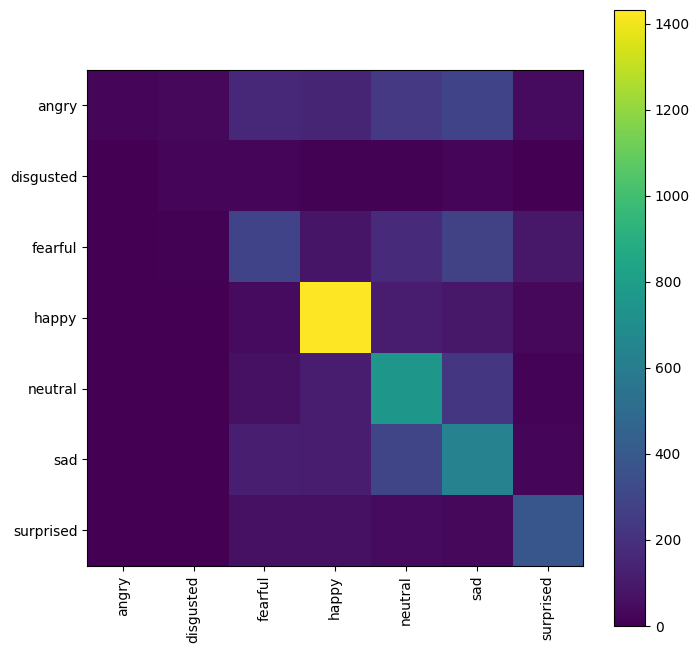

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

nb_train_samples = 23959
nb_validation_samples = 6614

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_data_gen.flow_from_directory(
        '/content/drive/MyDrive/emotion_data/test',
        color_mode = 'grayscale',
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical',
        shuffle=False)


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = emotion_model.predict_generator(validation_generator, 104)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test , preds  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show()
